In [1]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Problems

1. **Breakfast Cereals**. Use the data for the breakfast cereals to explore and summarize the data as follows:

    a. Which variables are quantitative/numerical? Which are ordinal? Which are nominal?

    b. Compute the mean, median, min, max, and standard deviation for each of the quantitative variables. This can be done using pandas.

    c. Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions:
        i. Which variables have the largest variability?
        ii. Which variables seem skewed?
        iii. Are there any values that seem extreme?

    d. Plot a side-by-side boxplot comparing the calories in hot vs. cold cereals. What does this plot show us?

    e. Plot a side-by-side boxplot of consumer rating as a function of the shelf height. If we were to predict consumer rating from shelf height, does it appear that we need to keep all three categories of shelf height?

    f. Compute the correlation table for the quantitative variable (method corr()). In addition, generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn library).
        i. Which pair of variables is most strongly correlated?
        ii. How can we reduce the number of variables based on these correlations?
        iii. How would the correlations change if we normalized the data first?

    g. Consider the first PC of the analysis of the 13 numerical variables in Table 4.12. Describe briefly what this PC represents.

In [2]:
cereals_df = pd.read_csv("../datasets/Cereals.csv")
cereals_df.head(9)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253


In [3]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


a) 

Quantitative/numerical variables:

    calories, protein, fat, sodium, fiber, sugars, potass, vitamin. weight, and cups

Ordinal

    Shelf, rating

Nominal

    name, mfr, type

b)

In [4]:
median = pd.DataFrame(cereals_df.median(), columns=["median"])
skew = pd.DataFrame(cereals_df.skew(), columns=["skew"])
summary_statistics = cereals_df.describe()

pd.concat([summary_statistics.T, median, skew], axis=1).T

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912
median,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
skew,-0.445407,0.745830,1.165989,-0.575711,2.431675,0.112726,0.044445,1.400355,2.463704,-0.410339,0.309857,-0.104981,0.910240


c)

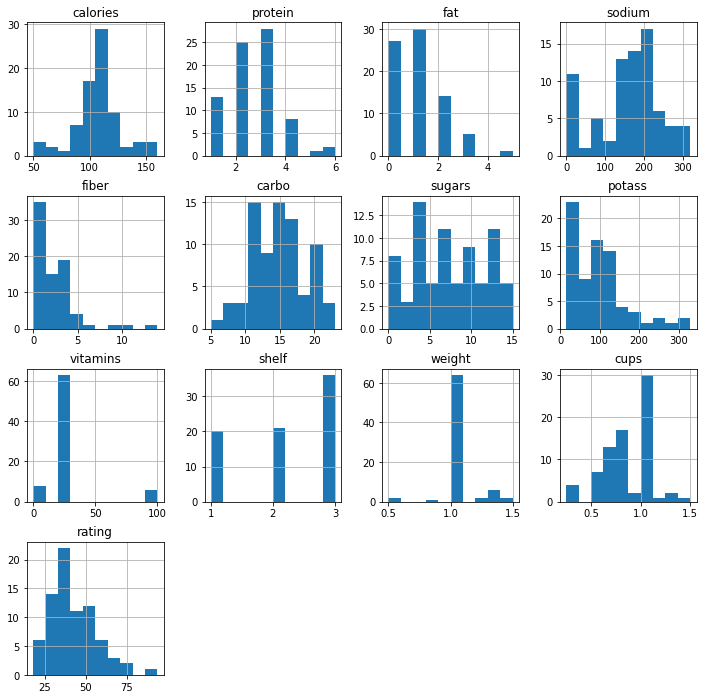

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cereals_numeric_df = cereals_df.select_dtypes(include=numerics)

cereals_numeric_df.hist(figsize=(12, 12))
plt.show()

i. Which variables have the largest variability?

    calories, sodium, potassium, vitamins and rating

ii. Which variables seem skewed?

    protein, fat, fiber, potassium, vitamins and rating
  
iii. Are there any values that seem extreme?

    100 for vitamins seems too far from the 75th percentile as well as 330 and 320 for potassium and sodium,
    respectively

d)

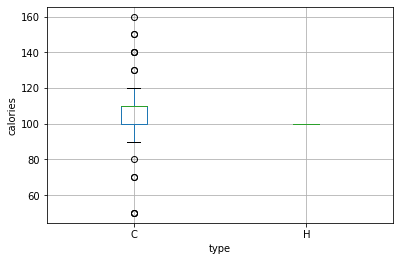

In [6]:
# side-by-side boxplot comparing the calories in hot vs. cold cereals
ax = cereals_df.boxplot(column="calories", by="type")
ax.set_ylabel("calories")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

In [7]:
mask = cereals_df.type == "H"
cereals_df[mask]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3.0,95.0,25,2,1.0,1.00,54.850917
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


It shows only a single metric, the median, if a value of 100. This make sense because all the observations (only three) have this same value. Other important observation is that a "box" could not be created, as the distribution have no range at all. 

e)

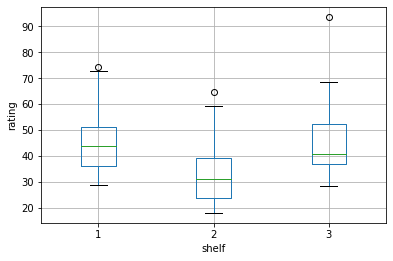

In [8]:
# side-by-side boxplot of consumer rating as a function of the shelf height
ax = cereals_df.boxplot(column="rating", by="shelf")
ax.set_ylabel("rating")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

From the side-by-side boxplot, one possibility would be to join the first and third shelfs products into one category as their interquartile range overlap significantly (25th around ratings of 35 and 75th around ratings of 50).

f)

In [9]:
corr = cereals_df.corr().round(2)
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.00,0.02,0.50,0.30,-0.29,0.26,0.57,-0.07,0.27,0.10,0.70,0.09,-0.69
protein,0.02,1.00,0.21,-0.05,0.50,-0.03,-0.29,0.56,0.01,0.13,0.22,-0.24,0.47
fat,0.50,0.21,1.00,-0.01,0.02,-0.30,0.30,0.20,-0.03,0.26,0.21,-0.18,-0.41
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.30,0.06,-0.04,0.36,-0.07,0.31,0.12,-0.40
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.38,-0.14,0.91,-0.03,0.30,0.25,-0.51,0.58
carbo,0.26,-0.03,-0.30,0.30,-0.38,1.00,-0.47,-0.37,0.22,-0.19,0.14,0.37,0.09
sugars,0.57,-0.29,0.30,0.06,-0.14,-0.47,1.00,0.00,0.10,0.07,0.46,-0.05,-0.76
potass,-0.07,0.56,0.20,-0.04,0.91,-0.37,0.00,1.00,-0.01,0.39,0.42,-0.50,0.42
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.22,0.10,-0.01,1.00,0.30,0.32,0.13,-0.24
shelf,0.10,0.13,0.26,-0.07,0.30,-0.19,0.07,0.39,0.30,1.00,0.19,-0.34,0.03


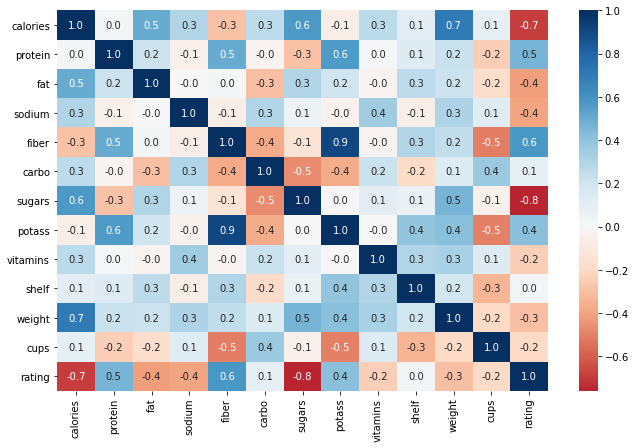

In [10]:
# include information about values
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

i. Which pair of variables is most strongly correlated?
 
         rating and sugars are negative and strongly correlated (approx. -0.8) as well as rating and calories (approx. -0.7). Other strongly (and positive) correlated variables are fiber and potassium (approx. 0.9), calories and weight (approx. 0.7) and calories and `fiber` (approx. 0.6).
     
     Pairs that have a very strong (positive or negative) correlation contain a lot of overlap in information and are good candidates for data reduction by removing one of the variables.
 
ii. How can we reduce the number of variables based on these correlations?

    One approach is to manually reduce, one at a time, variables that are strongly correlated. This is
    convenient when we can count on experts help while exploring the data.

    In a more automatic way, we can apply PCA (specially when the number of variables is high) as it
    provides a few variables (often as few as three) that are weighted linear combinations of the
    original variables, and that retain the majority of the information of the full original set.

    Another approach to reducing the number of predictors, which directly considers the predictive or
    classification task, is by fitting a regression model. We can employ subset selection procedures that
    algorithmically choose a subset of predictor variables among the larger set.

    Lastly, another method for reducing the number of columns and for combining categories of a
    categorical variable is by applying classification and regression trees, as the algorithm creates
    binary splits on the predictors that best classify/predict the outcome variable    

iii. How would the correlations change if we normalized the data first?

    A further use of PCA is to understand the structure of the data, and this is done by examining the
    weights to see how the original variables contribute to the different principal components. If
    the variables are presented in different scales, reflecting in high variance compared to the other
    variables, the principal components will be affected too much. If this is happening, we should
    consider normalize the data. The effect of this normalization is to give all variables equal
    importance in terms of variability.
    
    One important thing is to be aware when the units of measurement are common for the variables
    (e.g., dollars), and when their scale reflects their importance (sales of jet fuel, sales of
    heating oil). In such cases, it is probably best not to normalize (i.e., not to rescale the data
    so that they have unit variance). If the variables are measured in different units so that it is
    unclear how to compare the variability of different variables (e.g., dollars for some, parts per
    million for others) or if for variables measured in the same units, scale does not reflect
    importance (earnings per share, gross revenues), it is generally advisable to normalize.
    
g)

The purpose of PCA (principal component analysis) is to determine the combination of dependent variables that contains and describes most of the data. From the table mentioned in the question, we can see that the first three components account for more than 96% of the total variation associated with all 13 of the original variables. This suggests that we can capture most of the variability in the data with less than 25% of the original dimensions in the data.

But we should be careful with these results as the data was not normalized before computing the PCA. The effect of not normalizing the data makes the variables of potassium and sodium to dominate the total variance of the components, as they are much larger than the variances of the other variables.

2. **University Rankings**. The dataset on American college and university rankings (available from www.dataminingbook.com) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements that include continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or a public school).

a. Remove all categorical variables. Then remove all records with missing numerical measurements from the dataset.

b. Conduct a principal components analysis on the cleaned data and comment on the results. Should the data be normalized? Discuss what characterizes the components you consider key.

In [11]:
universities_df = pd.read_csv("../datasets/Universities.csv")
universities_df.head(9)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
5,Faulkner University,AL,2,345.0,320.0,179.0,NaN,27.0,1367.0,578.0,5600.0,5600.0,1550.0,1700.0,300.0,350.0,NaN,52.0,32.8,55.0
6,University of Montevallo,AL,1,1351.0,892.0,570.0,18.0,78.0,2385.0,331.0,2220.0,4440.0,NaN,NaN,124.0,300.0,600.0,72.0,18.9,51.0
7,Alabama State University,AL,1,4639.0,3272.0,1278.0,NaN,NaN,4051.0,405.0,1500.0,3000.0,1960.0,NaN,84.0,500.0,NaN,48.0,18.7,15.0
8,Auburn University-Main Campus,AL,1,7548.0,6791.0,3070.0,25.0,57.0,16262.0,1716.0,2100.0,6300.0,NaN,NaN,NaN,600.0,1908.0,85.0,16.7,69.0


In [12]:
columns = ['State', 'Public (1)/ Private (2)']

universities_df.drop(columns=columns, inplace=True)
universities_df.dropna(axis=0, inplace=True)
universities_df.head(9)

,College Name,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,University of Alaska Southeast,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
9,Birmingham-Southern College,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
11,Huntingdon College,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
21,Talladega College,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0
25,University of Alabama at Birmingham,1797.0,1260.0,938.0,24.0,35.0,6960.0,4698.0,2220.0,4440.0,1935.0,3240.0,291.0,750.0,2200.0,96.0,6.7,33.0
31,Arkansas College (Lyon College),708.0,334.0,166.0,46.0,74.0,530.0,182.0,8644.0,8644.0,2382.0,1540.0,120.0,500.0,800.0,79.0,12.6,54.0
37,Hendrix College,823.0,721.0,274.0,52.0,87.0,954.0,6.0,8800.0,8800.0,1935.0,1260.0,325.0,500.0,1200.0,82.0,13.1,63.0
38,John Brown University,605.0,405.0,284.0,24.0,53.0,961.0,99.0,6398.0,6398.0,1450.0,2222.0,148.0,400.0,1350.0,68.0,13.3,75.0


In [13]:
universities_df.describe()

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3147.303609,2062.955414,780.704883,28.012739,55.651805,3562.938429,797.454352,9406.634820,10575.161359,2221.10828,2121.940552,379.021231,548.783439,1311.940552,73.208068,13.962633,65.562633
std,4073.138136,2503.752754,915.633300,18.479196,20.324333,4669.226389,1545.796419,5516.794516,4311.672049,713.18811,566.861037,355.855253,163.185575,681.847238,16.665649,3.898855,18.146912
min,77.000000,61.000000,27.000000,1.000000,9.000000,249.000000,1.000000,608.000000,1044.000000,640.00000,531.000000,10.000000,90.000000,250.000000,8.000000,2.900000,15.000000
25%,802.000000,635.500000,264.000000,15.000000,40.000000,1018.000000,81.500000,3650.500000,7290.000000,1740.00000,1750.000000,137.500000,500.000000,850.000000,63.000000,11.300000,53.000000
50%,1646.000000,1227.000000,443.000000,23.000000,54.000000,1715.000000,299.000000,9858.000000,10100.000000,2090.00000,2082.000000,280.000000,500.000000,1200.000000,76.000000,13.400000,66.000000
75%,3862.000000,2456.000000,896.500000,36.000000,69.000000,4055.500000,869.000000,13246.000000,13286.000000,2663.00000,2420.000000,486.000000,600.000000,1600.000000,87.000000,16.450000,79.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,20100.000000,4816.00000,4541.000000,3247.000000,2340.000000,6800.000000,103.000000,28.800000,118.000000


It is a good idea to normalize this data first, as the variables are measured in different units so that it is
unclear how to compare the variability of different variables (e.g., dollars for some, room, board, etc.)

In [14]:
pca = PCA()
pca.fit(preprocessing.scale(universities_df.iloc[:, 1:]))

pca_summary_df = pd.DataFrame({"Standard deviation": np.sqrt(pca.explained_variance_),
                               "Proportion of variance": pca.explained_variance_ratio_,
                               "Cumulative proportion": np.cumsum(pca.explained_variance_ratio_)})

# use of the transpose() method to get the scores
pca_summary_df = pca_summary_df.transpose()
pca_summary_df.columns = ["PC{}".format(i) for i in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,2.2773,2.1449,1.0995,1.0336,0.9770,0.8738,0.8041,0.7736,0.7039,0.6629,0.6285,0.5503,0.4388,0.3042,0.2002,0.1745,0.1440
Proportion of variance,0.3044,0.2700,0.0710,0.0627,0.0560,0.0448,0.0380,0.0351,0.0291,0.0258,0.0232,0.0178,0.0113,0.0054,0.0024,0.0018,0.0012
Cumulative proportion,0.3044,0.5745,0.6454,0.7081,0.7642,0.8090,0.8469,0.8821,0.9111,0.9369,0.9601,0.9779,0.9892,0.9946,0.9970,0.9988,1.0000


In [15]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),
                                 columns=pca_summary_df.columns,
                                 index=universities_df.iloc[:, 1:].columns)
pca_components_df.iloc[:, :7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
# appli. rec'd,0.078361,0.420164,-0.031982,0.072621,-0.016694,0.112320,-0.268145
# appl. accepted,0.023659,0.434471,-0.031423,0.118128,-0.089073,0.114381,-0.266285
# new stud. enrolled,-0.028802,0.445556,-0.038651,-0.031466,-0.075981,0.054079,-0.098870
% new stud. from top 10%,0.354028,0.093547,-0.120129,-0.372457,0.162260,-0.004445,0.102709
% new stud. from top 25%,0.340496,0.118396,-0.142720,-0.385565,0.158187,0.092636,0.136409
# FT undergrad,-0.049586,0.443583,-0.004012,-0.056459,-0.094781,0.043504,-0.043157
# PT undergrad,-0.106380,0.287700,0.265769,0.053495,-0.343681,-0.188041,0.509297
in-state tuition,0.379389,-0.150248,0.084350,0.041064,-0.172639,-0.000539,-0.129328
out-of-state tuition,0.402555,-0.048728,0.051577,0.077658,-0.158499,-0.044407,-0.077965
room,0.273165,0.052271,0.250578,0.454416,-0.004482,-0.015068,-0.122402


It is necessary nine principal components to account for more than 90% of the total variability. The first two principal components account for only 57% of the total variability, and thus reducing the number of variables to two would mean losing a lot of information.

Examining the weights, it is possible to see that the first principal component measures the balance between two quantities:

(1) `stud./fac. ratio` (large negative weight) vs. (2) `% new stud. from top 10%`, `% new stud. from top 25%`, `in-state tuition`, `out-of-state tuition` and `Graduation rate` (large positive weights).

High scores on principal component 1 mean that the university is low in `stud./fac. ratio`, and high in `% new stud. from top 10%`, `% new stud. from top 25%`, `in-state tuition`, `out-of-state tuition` and `Graduation rate`.

The result suggests that this type of university is associated with a `Graduation rate`, independently of the state resident costs (in/out tuitions). Also, such universities have low Student-to-Faculty (this ratio describes a class size of students per every one teacher or faculty member).

The second principal component is most affected by the `# appli. rec'd`, `# appl. accepted`, `# new stud. enrolled` and `# FT undergrad`. Possibly indicating the group of known and popular universities with full time credits courses.

The third principal component is affected by `estim. book costs` and `estim. personal $`, suggesting that this group is decided mostly by cost/money likely to pay.

We can continue labeling the next principal components in a similar fashion to learn about the structure of the data.

3. **Sales of Toyota Corolla Cars**. The file `ToyotaCorolla.csv` contains data on used cars (Toyota Corollas) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal will be to predict the price of a used Toyota Corolla based on its specifications.

    a. Identify the categorical variables.
    
    b. Explain the relationship between a categorical variable and the series of binary dummy variables derived from it.
    
    c. How many dummy binary variables are required to capture the information in a categorical variable with N categories?
    
    d. Use Python to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, the values in the derived binary dummies.
    
    e. Use Python to produce a correlation matrix and matrix plot. Comment on the relationships among variables.

In [16]:
toyota_df = pd.read_csv("../datasets/ToyotaCorolla.csv")
toyota_df.head(9)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,0,0,0,1,1,0,0


In [17]:
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


a)

 - `Model`- a variable with 374 unique values.
 - `Fuel_Type` - a categorical variable with 3 different values
 - `Color` - a variable with 10 distinct colors.

There are also numerical categorical variables in the dataset such as `Mistlamps`, `Powered_Windows`, `Airbag_1`, `Met_color`, `Power_Steering`, `BoardComputer`, `Automatic`, `Mfr_Guarantee`, `BOVAG_Guarantee`, `ABS`, `Airbag_2`, `Radio_Casette`, `Airco`, `Automatic_Airco`, `Mfg_Month`, `CD_Player`, `Gears`, `Central_Lock`, `Radio`, `Sport_model`, `Backseat_Divider`, `Metallic_Ring`, `Parking_Assistant`, `Tow_Bar`.

The rationale for considering `Gears` as a categorical variable is based on the fact that gears can have 3 values only.

On the other hand, `Doors` and `Cylinders` have not been considered, given that they do not provide a noteworthy correlation in price. Besides, cylinders have a fixed number throughout the dataset, an aspect that makes it not to have an impact on the data. As such, we have a total of 27 categorical variables

b)

A Dummy variable is a variable created to represent an attribute with two or more distinct categories/levels, such that a variable with N categories will be transformed into N or N-1 dummy variables and each dummy will represent if a certain category is present or not (1 or True, 0 or False). 

Example:

- Petrol, Diesel, and CNG. 

If we convert fuel type to dummy variables, we will get 3 dummy variables:

- Fuel_Type_Petrol (if the fuel type is Petrol then Fuel_Type_Petrol=1, otherwise Fuel_Type_Petrol=0)
- Fuel_Type_Diesel (if the fuel type is Diesel then Fuel_Type_Diesel=1, otherwise Fuel_Type_Diesel=0)
- Same for CNG

We create N-1 dummy variables when we have categorical variables which can be divided into Yes or No, respectively, so it can be converted into 1 and 0 respectively.

c)

- N or N-1 dummy binary variables are required to capture the information in a categorical variable with N categories. In the N-1 case we can consider the Linear Regression case. If we use of all N dummies a failure will occur because the nth variable contains redundant information and can be expressed as a linear combination of the others.


- In places where only 2 categories are there, N-1 variables should be used as they contain all the available information about the variable from which they were derived. Example:

    "A car has Central Lock or not". This car will be in two categories Yes or No (1 or 0). So dummy variable will be one of the following, has central lock=1 or not have central lock=0
    
    
- Generally, both the '0' and '1' does not indicate numerical values but are strings representing something valuable information about the variable.

d)

Applying the following commands:

    toyota_df.Fuel_Type = toyota_df.Fuel_Type.astype("category")
    toyota_df = pd.get_dummies(toyota_df, columns=["Fuel_Type"], prefix_sep="_", drop_first=False)

We get three different dummy variables, namely:

    'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'
    
Therefore, taking the first row as an example, (`Fuel_Type` = Diesel) the values in dummy variables are as follows:

- Fuel_Type_Diesel = 1
- Fuel_Type_Petrol = 0
- Fuel_Type_CNG = 0

In other words, the `Fuel_Type_Diesel` variable is '1' and other variable against the same row are '0'.

d)

In [18]:
corr = toyota_df.corr().round(2)
corr

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,1.00,-0.74,0.91,0.04,-0.92,0.27,-0.11,-0.08,0.07,-0.12,...,-0.24,-0.09,-0.01,-0.14,-0.03,-0.14,-0.02,-0.01,-0.05,0.16
Price,-0.74,1.00,-0.88,-0.02,0.89,-0.57,0.31,0.11,0.03,0.13,...,0.36,0.06,-0.04,0.22,0.16,0.10,0.11,-0.04,0.04,-0.17
Age_08_04,0.91,-0.88,1.00,-0.12,-0.98,0.51,-0.16,-0.11,0.03,-0.10,...,-0.28,-0.07,0.01,-0.13,-0.11,-0.12,-0.04,0.01,-0.05,0.19
Mfg_Month,0.04,-0.02,-0.12,1.00,-0.06,-0.02,-0.04,0.03,0.01,0.04,...,0.03,-0.06,0.03,-0.03,0.05,0.02,0.02,0.03,0.01,-0.04
Mfg_Year,-0.92,0.89,-0.98,-0.06,1.00,-0.50,0.16,0.10,-0.03,0.09,...,0.28,0.08,-0.02,0.13,0.10,0.11,0.04,-0.02,0.05,-0.18
KM,0.27,-0.57,0.51,-0.02,-0.50,1.00,-0.33,-0.08,-0.08,0.10,...,-0.16,0.01,0.01,-0.07,-0.04,-0.05,-0.01,0.02,-0.06,0.08
HP,-0.11,0.31,-0.16,-0.04,0.16,-0.33,1.00,0.06,0.01,0.04,...,0.27,0.05,0.02,0.21,-0.01,0.01,0.21,0.02,0.03,0.07
Met_Color,-0.08,0.11,-0.11,0.03,0.10,-0.08,0.06,1.00,-0.02,0.03,...,0.15,0.09,0.07,0.02,0.00,0.04,0.05,0.07,0.04,0.15
Automatic,0.07,0.03,0.03,0.01,-0.03,-0.08,0.01,-0.02,1.00,0.07,...,-0.01,-0.00,-0.01,0.00,0.01,-0.02,-0.08,-0.01,0.16,0.02
CC,-0.12,0.13,-0.10,0.04,0.09,0.10,0.04,0.03,0.07,1.00,...,0.06,0.03,-0.00,0.02,-0.04,-0.06,0.00,-0.00,0.00,0.00


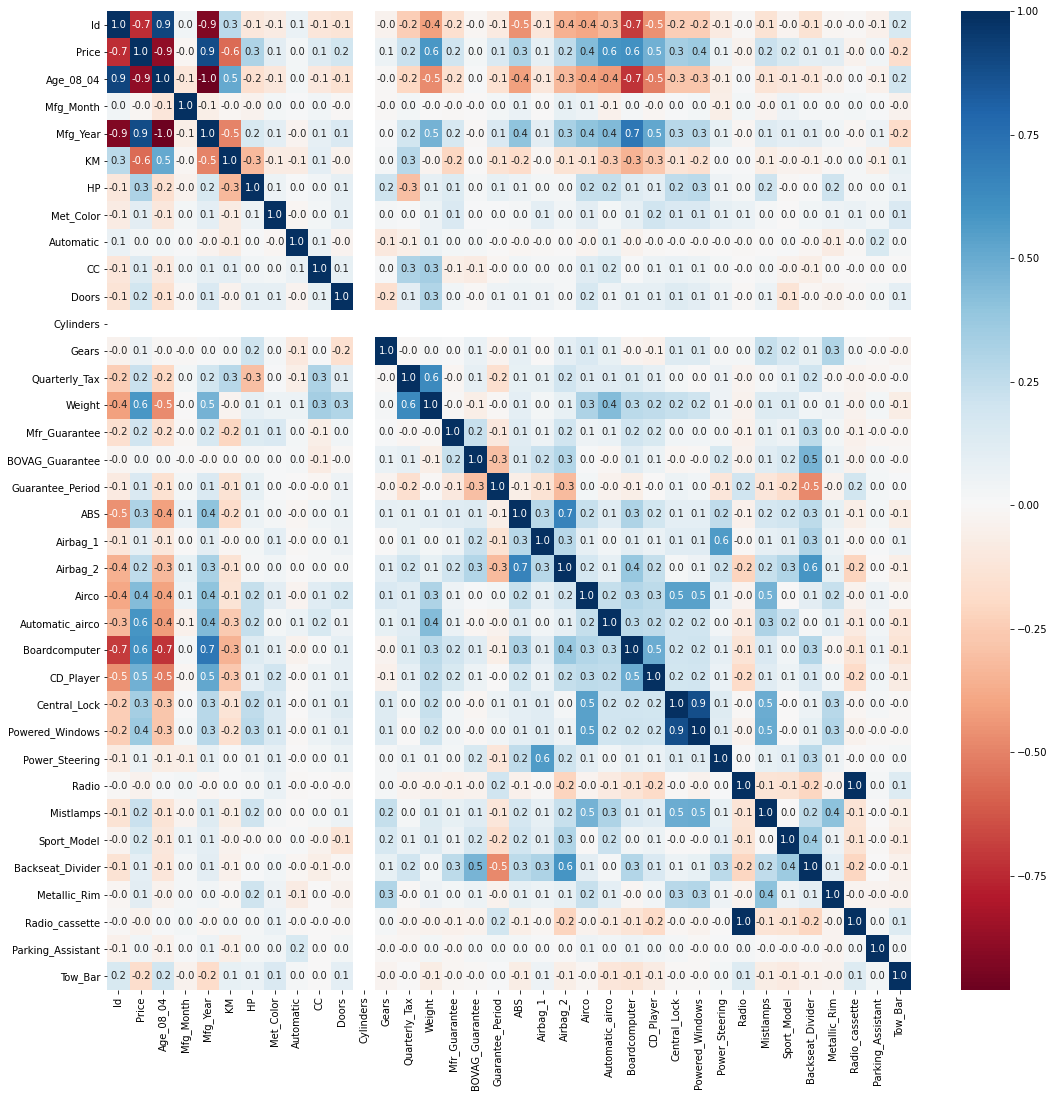

In [19]:
# include information about values
fig, ax = plt.subplots()
fig.set_size_inches(18, 18)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

In [20]:
pd.unique(toyota_df.Cylinders)

array([4])

- `Age_08_04` is negatively correlated with price (approx. -0.9), meaning that when the car is older, the price is likely to be lower. It is also negatively correlated with `Boardcomputer` for logical reasons, older cars do not have computer embedded. Apparently the `Age_08_04` was derived from the `Mfg_Year` as they have a correlation of -1.0;

- `KM` is negatively correlated with `price`(approx. -0.6). This means that When the `KM` increases, the price of the car is likely to decrease. `KM` is also slightly negatively correlated with `Mfg_Year` (approx. -0.5);

- `Weight` is positively correlated with `price` (approx. 0.6), as well as with `QuarterlyTax`. We can interpret this as the following, as the `Weight` of a car increases, the `price` is likely to raise, as well as to the `Quarterly_Tax` to pay for;

Other interesting observations:

- `Radio` and `Radio Cassette` might mean the same thing for this dataset as their correlation value is approx. 1. We can drop one of the two for further data analysis;

- The number of `Cylinders` is uniform for all rows (=4), so we can drop this variable as it has no predictive power;